In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
image_sub_vgg = pd.read_csv('../input/melanoma-keras-vgg/submission.csv')  ## 81%
image_sub_eff = pd.read_csv('../input/efficientnet-b5-b6-b7-tf-keras/submission_EfficientNet_B7_Blend.csv')  ## 93.9%
image_sub_eff2 = pd.read_csv('../input/melanoma-efficient-net-stratified-k-fold/submission.csv')  ## 94.5%
tabular_sub = pd.read_csv('../input/melanoma-tabular-data-xgboost/submission.csv') ## Old tabular sub -> 72.88 AUC with XGBoost
#tabular_sub = pd.read_csv('../input/tabular-data-model/submissions_tabular.csv')  ## New tabular sub -> 79%, worsens performance
image_preds = pd.read_csv('../input/melanomapreds/submissionImage.csv')
tabular_sub.head()

,image_name,target
0,ISIC_0052060,0.127400
1,ISIC_0052349,0.126597
2,ISIC_0058510,0.126603
3,ISIC_0073313,0.126603
4,ISIC_0073502,0.137188


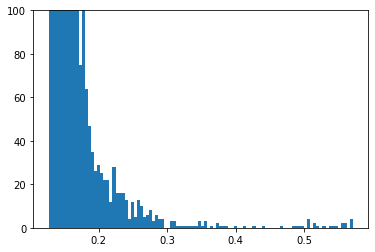

In [3]:
plt.hist(tabular_sub.target,bins=100)
plt.ylim((0,100))
plt.show()

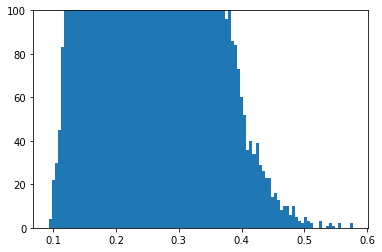

In [4]:
plt.hist(image_sub_vgg.target,bins=100)
plt.ylim((0,100))
plt.show()

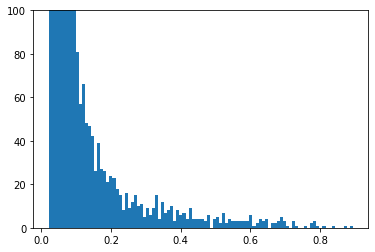

In [5]:
plt.hist(image_sub_eff.target,bins=100)
plt.ylim((0,100))
plt.show()

In [6]:
'''
eff-net single model - 93.90
0.5 eff : 0.5 old tabular - 93.54
0.7 eff : 0.3 old tabular - 93.95
0.7 eff : 0.3 new tabular - 93.00 
0.5 eff : 0.5 new tabular - 91.60
0.9 eff : 0.1 new tabualr - 93.86
'''

sub = tabular_sub.copy()
sub.target = 0.9 * image_sub_eff2.target.values + 0.1 * tabular_sub.target.values
sub.to_csv('submission.csv',index=False)

### Use power averaging for AUC
https://www.kaggle.com/c/siim-isic-melanoma-classification/discussion/165653

In [7]:
sub = tabular_sub.copy()
sub.target = (np.power(image_sub_eff2.target.values, 4) + np.power(image_sub_eff.target.values, 4) + 
              np.power(image_preds.target.values, 4)) /3
sub.to_csv('power_avg_submission.csv',index=False)

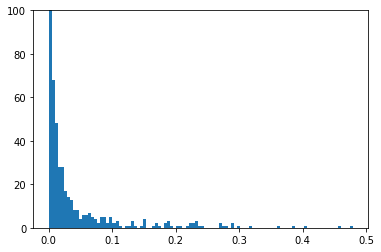

In [8]:
plt.hist(sub.target,bins=100)
plt.ylim((0,100))
plt.show()